In [1]:
# Leticia Mara Berto                212069
# Thales Mateus Rodrigues Oliveira  148051

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD

In [3]:
####  Leia o arquivo X.npy  ###

#X é um arquivo de 3023 linhas e 1850 colunas. 
#Mas cada linha é na verdade uma imagem em tons de cinza de 50 por 37 pixels de pessoas famosas

X = np.load("X.npy")

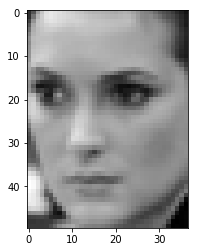

In [4]:
####  Imprima a imagem da primeira pessoa  ###

#cada linha da matriz X precisa ser transformada numa matriz 50x37 para que o imshow funcione (reshape).
img = X[0,:].reshape(50,37) 

#Ha também a codificação de cores da imagem; como a imagem é em tons de cinza a codificação é a cm.gray
plt.imshow(img, plt.cm.gray)

In [5]:
### faz fatoração svd da matriz X ###

print("Matriz X tem dimensões {}x{}".format(X.shape[0], X.shape[1]))

# faz a versão full matrix
u, d_vec, v_inv = np.linalg.svd(X, True)

# converte d da forma de vetor de tamanho n para uma matrix mxn
d = np.zeros((X.shape[0], X.shape[1]))
d[:X.shape[1], :X.shape[1]] = np.diag(d_vec)
print("Na versão full matrix, as matrizes U, D e V^(-1) tem o formato, respectivamente: {}x{}, {}x{} e {}x{}".
      format(u.shape[0], u.shape[1], d.shape[0], d.shape[1], v_inv.shape[0], v_inv.shape[1]))

# faz a versão compacta
u_comp, d_vec_comp, v_inv_comp = np.linalg.svd(X, False)

# converte d da forma de vetor de tamanho n para uma matrix nxn
d_comp = np.diag(d_vec_comp)
print("Na versão compacta, as matrizes U, D e V^(-1) tem o formato, respectivamente: {}x{}, {}x{} e {}x{}".
      format(u_comp.shape[0], u_comp.shape[1], d_comp.shape[0], d_comp.shape[1], v_inv_comp.shape[0], v_inv_comp.shape[1]))


Matriz X tem dimensões 3023x1850
Na versão full matrix, as matrizes U, D e V^(-1) tem o formato, respectivamente: 3023x3023, 3023x1850 e 1850x1850
Na versão compacta, as matrizes U, D e V^(-1) tem o formato, respectivamente: 3023x1850, 1850x1850 e 1850x1850


In [6]:
### Verificar a formulação compacta do SVD
diff = X - u_comp.dot(d_comp.dot(v_inv_comp))
max_error = np.max(np.abs(diff))
print("O maior erro da fatoração é, em módulo:", max_error)

mean_X = np.mean(X)
mean_and_error_comparison = 1 - abs(mean_X - max_error)/mean_X
print("O maior erro da fatoração, quando comparado com a média dos valores da matrix X original, causa uma divergência de {}, ou seja {}%.".
      format(mean_and_error_comparison, mean_and_error_comparison*100))


O maior erro da fatoração é, em módulo: 0.00047302246
O maior erro da fatoração, quando comparado com a média dos valores da matrix X original, causa uma divergência de 3.635883331298828e-06, ou seja 0.0003635883331298828%.


In [7]:
####  Compute a matriz reduzida e a matriz reconstruída  ###

# Matriz reduzida. Usando k = 100
k = 100
X_reduced = np.dot(u_comp[:,0:k], d_comp[0:k,0:k])
print ("Matriz reduzida: ", X_reduced.shape)

# Matrix reconstruida
#X_rebuilt = np.dot(u_comp[:,0:k], np.dot(d_comp[0:k,0:k], v_inv_comp[0:k,:]))
X_rebuilt  = np.dot(X_reduced, v_inv_comp[0:k,:])

Matriz reduzida:  (3023, 100)


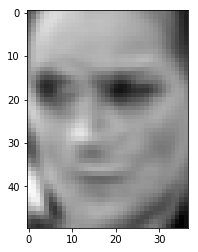

In [8]:
####  Imprima a imagem reconstruída da 1a pessoa redução  ###

imgRec = X_rebuilt[0,:].reshape(50,37) 
plt.imshow(imgRec, plt.cm.gray)

(3023, 100)
(100, 1850)


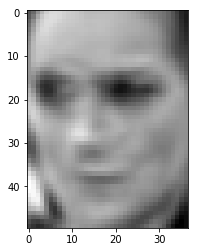

In [9]:
svd = TruncatedSVD(n_components = k)
XT = svd.fit_transform(X) #Fit LSI model to X and perform dimensionality reduction on X.

print(XT.shape)
print(svd.components_.shape)
imgRecTruncated = svd.inverse_transform(XT)[0,:].reshape(50, 37)
plt.imshow(imgRecTruncated, plt.cm.gray)

#Outra forma de obter a matriz reconstuido usando o TruncatedSVD:
# o método a seguir é baseado em https://stackoverflow.com/questions/31523575/get-u-sigma-v-matrix-from-truncated-svd-in-scikit-learn
#imgRecTruncated2 = np.dot(XT, svd.components_)[0,:].reshape(50, 37)
#plt.imshow(imgRecTruncated2, plt.cm.gray)
